Matthew Donaldson
ML - Assignment 4

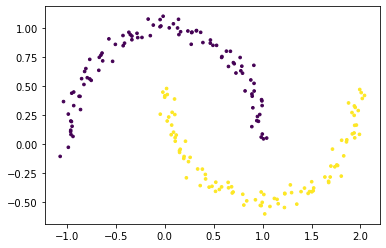

In [2]:
## Problem 1 part a

## Making a data set that is not linearly seperable from a function in SKlearn called make moons
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np
from sklearn.model_selection import train_test_split

#Make two interleaving half circles
x,y = make_moons(n_samples=200, shuffle=True,
                 noise=0.05, random_state=None)
## Plotting all the data points and showing which values of each data point
plt.scatter(x[:,0], x[:,1], c=y, s=7)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


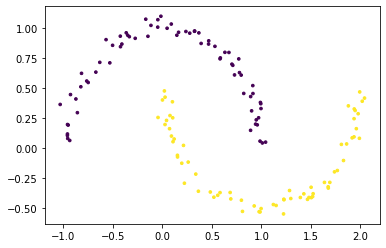

In [3]:
## plotting only the training set to confirm roughly the 7:3 ratio of train:test
plt.scatter(x_train[:,0], x_train[:,1],c=y_train, s=7)
plt.show()



Problem - 1b

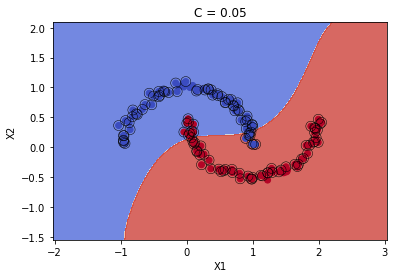

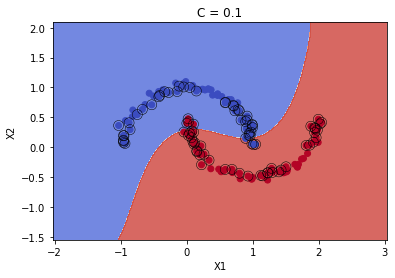

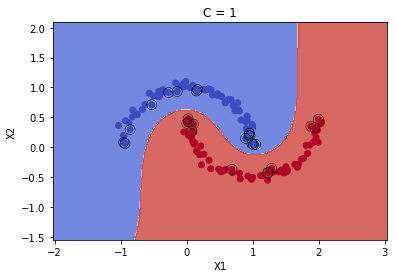

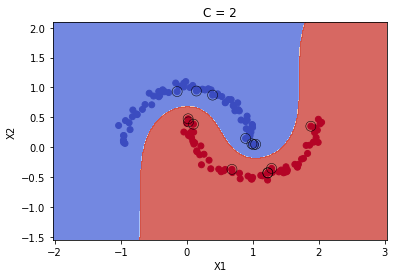

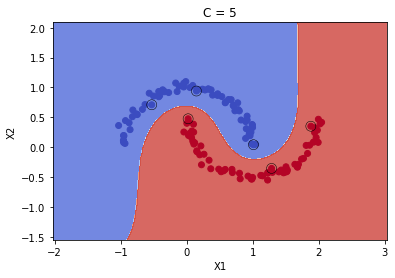

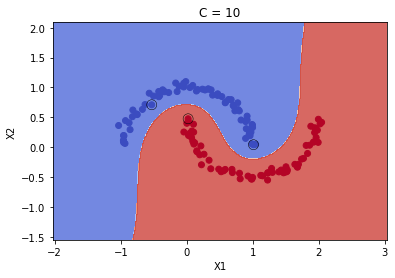

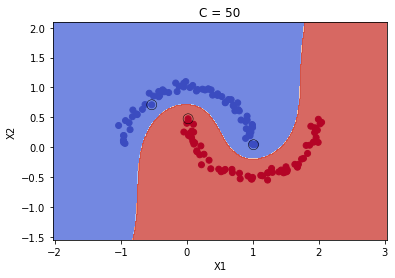

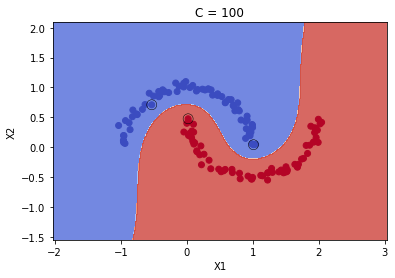

In [27]:
## Problem 1 - part b
## It should be noted that for plotting the decision boundry and the support vectors 
## scikit learn was used to aid in implementation
from sklearn import svm
from sklearn import metrics

title = ['C = 0.05', 'C = 0.1', 'C = 1', 'C = 2', 'C = 5', 'C = 10', 'C = 50', 'C = 100' ]
j = 0
for i in [0.05, 0.1, 1, 2, 5, 10, 50, 100]:
    ## creating a fit for SVM with different C values
    svc  = svm.SVC(C = i, random_state = 1)
    svc.fit(x_train, y_train)


    # Creating the values for the fit to predict to make the boundry
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max,0.01),
                     np.arange(y_min, y_max, 0.01))

    ## Making the Decision Boundry
    y_predict = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    y_predict = y_predict.reshape(xx.shape)
    
    ## Using decision function in skLearn to find the support vectors, help from skikit learn
    dec_func = svc.decision_function(x_train)
    s_v_i = np.where(np.abs(dec_func) <= 1 + 1e-5)[0]
    sv = x_train[s_v_i]
    
    ## plotting Decision Boundry, support vectors and the data
    plt.contourf(xx, yy, y_predict, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(sv[:, 0],sv[:, 1],s=100,linewidth=0.5,facecolors="none",edgecolors="k",)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title[j])
    plt.show()
    ## updating index for title to label graphs correctly
    j += 1




As C increases the model seems to do better. That is due to the large reularization penalty to the error function. I noticed that when C < 1 the model does not predict all the values of the points but for C > 1 as C increases the optimal margin seems to be reached. This makes sense because with small C the penalty regualizer is small, while wen C is big the penalty regularizer is bigger. Also as C increased the support vectors decreased. 

Problem -1c

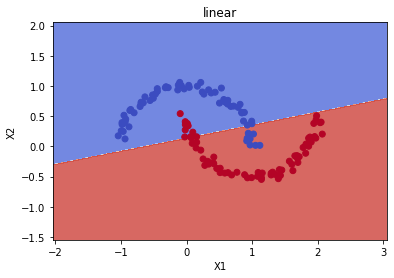

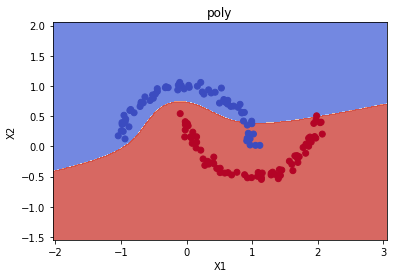

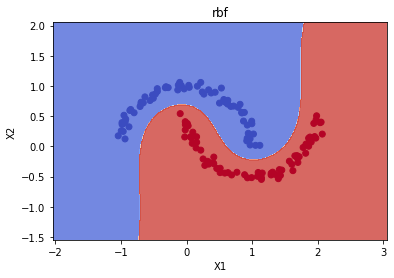

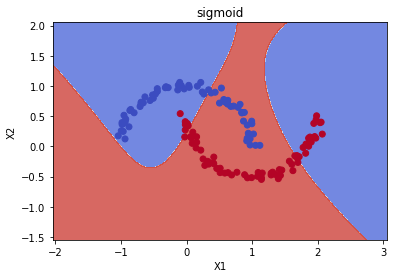

In [98]:
## Problem 1 - part c
from sklearn.metrics import classification_report, confusion_matrix

C = 5
## Poly fit
poly_fit  = svm.SVC(C = C, kernel = 'poly', degree = 3).fit(x_train,y_train)

## Linear fit
linear_fit = svm.SVC(C=C, kernel = 'linear').fit(x_train,y_train)

## rbf fit
rbf_fit = svm.SVC(C = C, kernel = 'rbf', gamma=0.9).fit(x_train,y_train)

## rbf fit
sigmoid_fit = svm.SVC(C = C, kernel = 'sigmoid').fit(x_train,y_train)
#########################################################################################
# Creating the values for the fit to predict to make the boundry
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.01),
                     np.arange(y_min, y_max, 0.01))
##########################################################################################
## Making the Decision Boundry
y_predict_poly = poly_fit.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

y_predict_linear = linear_fit.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

y_predict_rbf = rbf_fit.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

y_predict_sigmoid = sigmoid_fit.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

############################################################################################3
## plotting Decision Boundry and data
title = ['linear', 'poly', 'rbf', 'sigmoid']
j = 0
for i in [y_predict_linear, y_predict_poly, y_predict_rbf, y_predict_sigmoid]:
    
    plt.contourf(xx, yy, i, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title[j])
    plt.show()
    
    j+= 1


In [99]:
## Prediction
## Prediction based on poly fit
y_pred_poly = poly_fit.predict(x_train)

## Prediction based on linear fit
y_pred_linear = linear_fit.predict(x_train)

## Prediction based on rbf fit
y_pred_rbf = rbf_fit.predict(x_train)

## Prediction based on linear fit
y_pred_sigmoid = sigmoid_fit.predict(x_train)


print("The Classification report for linear model is: \n", classification_report(y_train, y_pred_linear))
print('')
print("The Classification report for poly model is: \n", classification_report(y_train, y_pred_poly))
print('')
print("The Classification report for rbf model is: \n", classification_report(y_train, y_pred_rbf))
print('')
print("The Classification report sigmoid model is: \n", classification_report(y_train, y_pred_sigmoid))

The Classification report for linear model is: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        68
           1       0.89      0.86      0.87        72

    accuracy                           0.87       140
   macro avg       0.87      0.87      0.87       140
weighted avg       0.87      0.87      0.87       140


The Classification report for poly model is: 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91        68
           1       0.88      0.99      0.93        72

    accuracy                           0.92       140
   macro avg       0.93      0.92      0.92       140
weighted avg       0.93      0.92      0.92       140


The Classification report for rbf model is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        72

    accuracy                          

From the graphs of each kernel function it looks like RBF performs the best. This is supported by the classification report generated above. As seen in each report the a f1-score accuracy for linear, poly, rbf and sigmoid are 0.87, 0.92, 1.00, 0.61 respectively. So this clearly shows that rbf performed the best because it had an accuracy of 1.00.

Assignment 4 Problem 2 - implementing ANN

In [100]:
#import libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

digits = load_digits()

x = digits.data
y = digits.target

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=5)

In [101]:
train_score = []
test_score = []
numNodes = list(range(5,200,1)) 
## Changes the amount of nodes in the hidden layers used in the model, fits the training data then adds 
## the score of the model to training score and test score
for i in numNodes:
    MLP = MLPClassifier(activation = 'logistic', solver = 'sgd', hidden_layer_sizes = (i,), 
                       alpha=1e-2, max_iter = 400, learning_rate_init = 0.1)
                        ## Solves using stochastic gradient descent, has i hidden layers, learning rate of 0.1
                        ## alpha is L2 penalty valye
    ## Fits model to data
    MLP.fit(train_x,train_y)
    ## Calc the score of how well the model did and adds it to a list
    train_score.append(MLP.score(train_x,train_y))
    test_score.append(MLP.score(test_x,test_y))

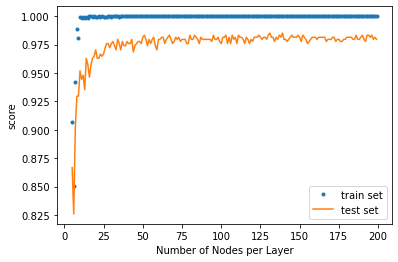

In [102]:
# Plot training and test scores to see how well the amount of layers did
plt.plot(numNodes,train_score,'.',label = 'train set')
plt.plot(numNodes,test_score,'-',label = 'test set')
plt.xlabel('Number of Nodes per Layer')
plt.ylabel('score')
plt.legend()
plt.show()



In [104]:
## Finds the highest scoring layer number
numNodes[test_score.index(max(test_score))]

131

Even though the best nodes says to be 131, but it can be seen in the graph that after 25ish nodes, the test set score platos and so I think the best numebr of hidden nodes can vary. So I think around 25 nodes would be best because it still produces a high test score and will not be to computationaly expensive.